# SpecialTopic_HM01
Final notebook with dataset download, extraction, sampling, and 15 visualization scenarios.

In [4]:

import requests, zipfile, tarfile, io, random, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, os

# --- Download ZIP ---
url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"
headers = {'User-Agent': 'Mozilla/5.0'}
print("Downloading Yelp dataset...")
resp = requests.get(url, stream=True, headers=headers)
resp.raise_for_status()

with open("Yelp-JSON.zip","wb") as f:
    for chunk in resp.iter_content(chunk_size=8192):
        f.write(chunk)
print("ZIP downloaded ✓")

# --- Extract ZIP using python ---
with zipfile.ZipFile("Yelp-JSON.zip","r") as z:
    z.extractall("yelp_zip")
print("ZIP extracted ✓")

# --- Extract TAR ---
tar_path = "yelp_zip/Yelp JSON/yelp_dataset.tar"
with tarfile.open(tar_path, "r") as tar:
    tar.extractall("yelp_dataset")
print("TAR extracted ✓")

# --- Sampling ---
business_file='yelp_dataset/yelp_academic_dataset_business.json'
review_file='yelp_dataset/yelp_academic_dataset_review.json'
user_file='yelp_dataset/yelp_academic_dataset_user.json'

sample_rate_business=0.50
sample_rate_large=0.10

def sample_json(filename, rate):
    lines=[]
    with open(filename,'r',encoding='utf-8') as f:
        for line in f:
            if random.random()<rate:
                lines.append(line)
    return pd.read_json(io.StringIO(''.join(lines)), lines=True)

df_business = sample_json(business_file, sample_rate_business)
df_review   = sample_json(review_file,   sample_rate_large)
df_user     = sample_json(user_file,     sample_rate_large)

print("Sampling complete ✓")
print(df_business.shape, df_review.shape, df_user.shape)

sns.set(style="whitegrid")


ZIP downloaded ✓
ZIP extracted ✓


/tmp/ipython-input-1578552696.py:23: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall("yelp_dataset")


TAR extracted ✓
Sampling complete ✓
(75017, 14) (699919, 9) (198847, 22)


## Scenario 1

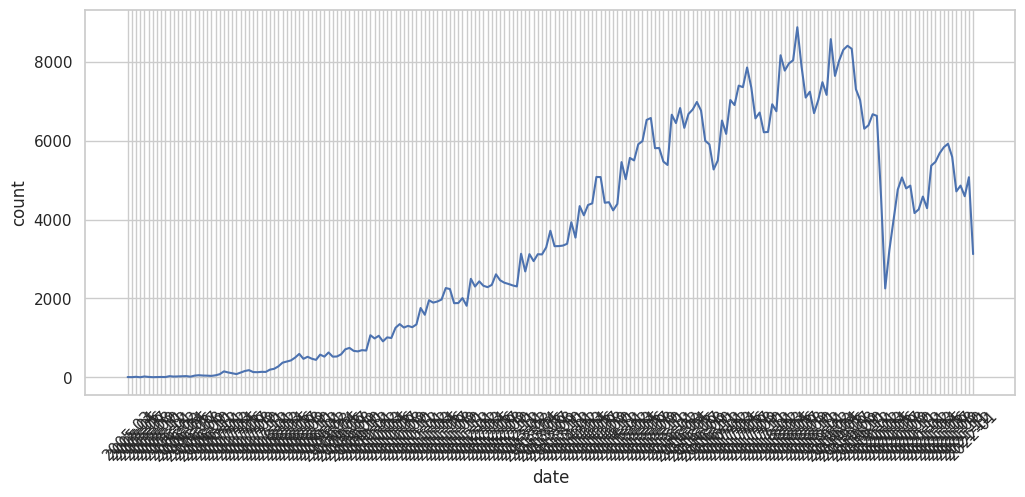

In [5]:
df_review['date']=pd.to_datetime(df_review['date']); monthly=df_review.groupby(df_review['date'].dt.to_period('M')).size().reset_index(name='count'); monthly['date']=monthly['date'].astype(str); plt.figure(figsize=(12,5)); sns.lineplot(data=monthly,x='date',y='count'); plt.xticks(rotation=45); plt.show()

## Scenario 2

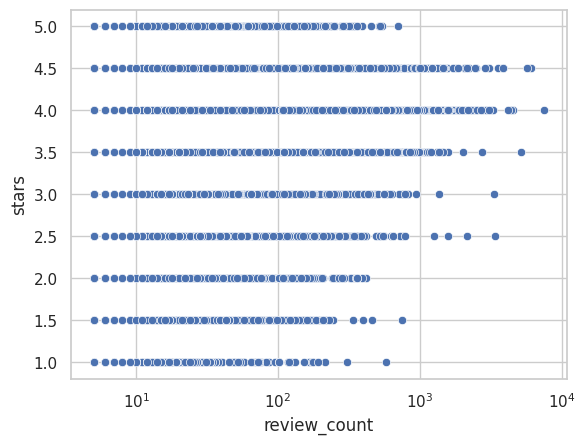

In [6]:
sns.scatterplot(data=df_business,x='review_count',y='stars'); plt.xscale('log'); plt.show()

## Scenario 3

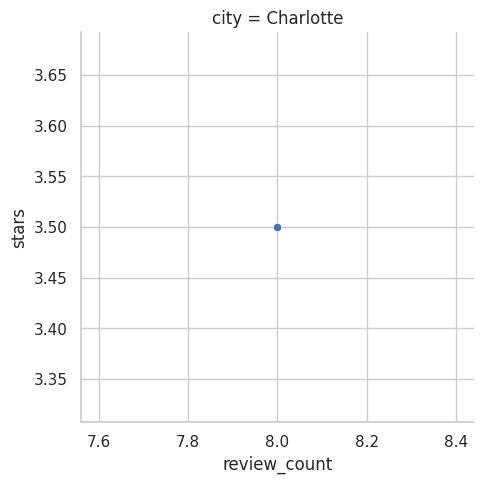

In [7]:
cities=df_business[df_business['city'].isin(['Phoenix','Charlotte'])]; sns.relplot(data=cities,x='review_count',y='stars',col='city',kind='scatter'); plt.show()

## Scenario 4

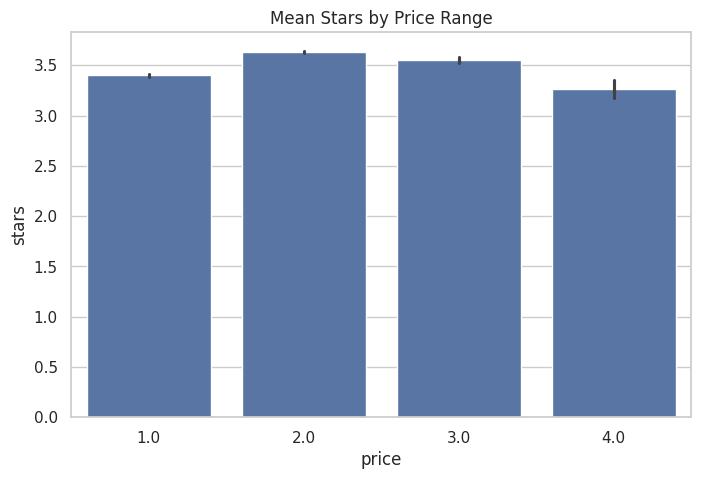

In [9]:
bp = df_business[['stars','attributes']].dropna().copy()

# استخراج price با هندل کردن ساختار dict
def extract_price(attr):
    if not isinstance(attr, dict):
        return None
    val = attr.get('RestaurantsPriceRange2', None)
    if val in [None, "None", "null", "", {}]:
        return None
    try:
        return int(val)   # تبدیل امن به int
    except:
        return None

bp['price'] = bp['attributes'].apply(extract_price)

# حذف رکوردهای بدون price معتبر
bp = bp.dropna(subset=['price'])

plt.figure(figsize=(8,5))
sns.barplot(data=bp, x='price', y='stars')
plt.title("Mean Stars by Price Range")
plt.show()


## Scenario 5

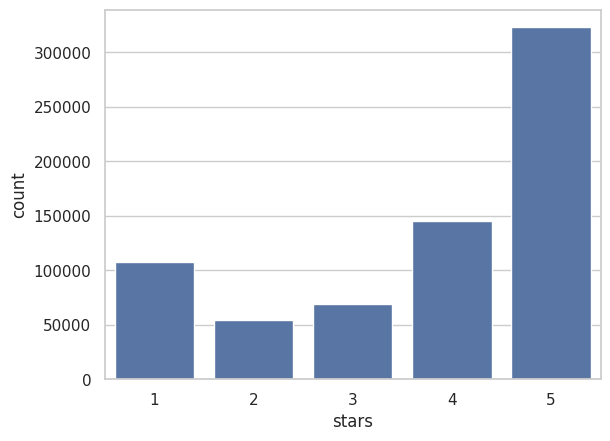

In [10]:
sns.countplot(data=df_review,x='stars'); plt.show()

## Scenario 6

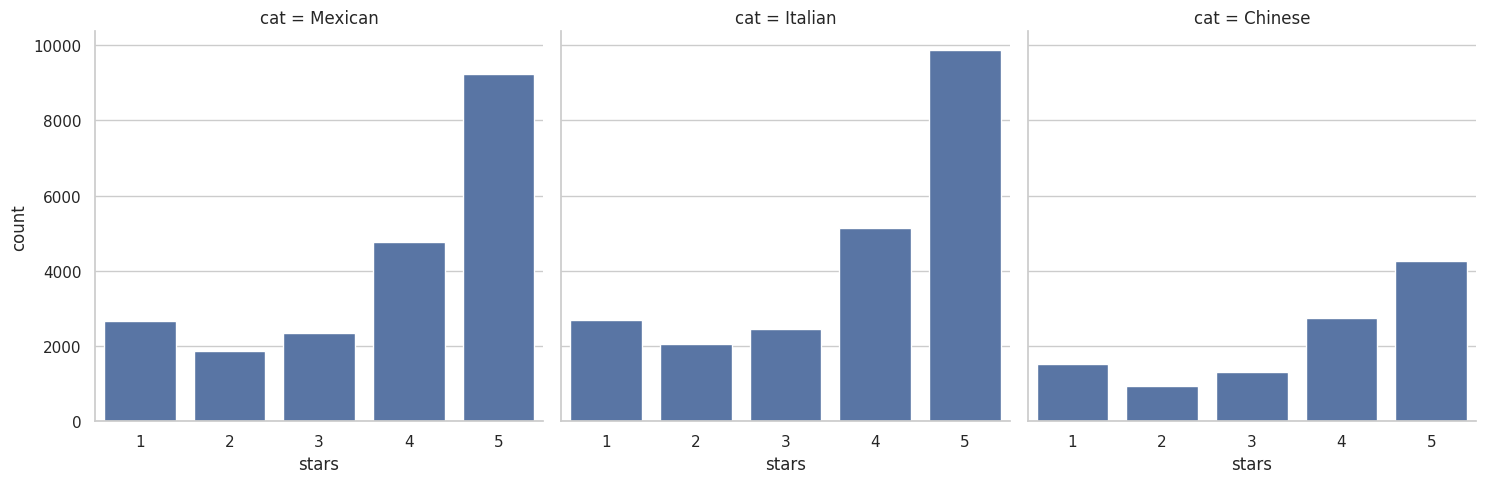

In [11]:
cats=['Italian','Mexican','Chinese']; biz=df_business[df_business['categories'].astype(str).str.contains('|'.join(cats))]; merged=df_review.merge(biz[['business_id','categories']],on='business_id'); merged['cat']=merged['categories'].str.extract(f"({'|'.join(cats)})"); sns.catplot(data=merged,x='stars',col='cat',kind='count'); plt.show()

## Scenario 7

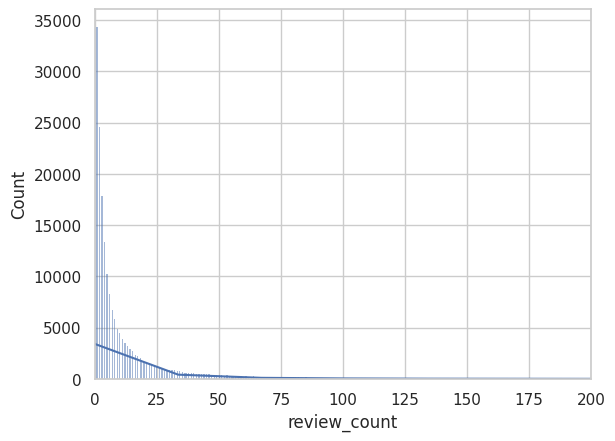

In [12]:
sns.histplot(df_user['review_count'],kde=True); plt.xlim(0,200); plt.show()

## Scenario 8

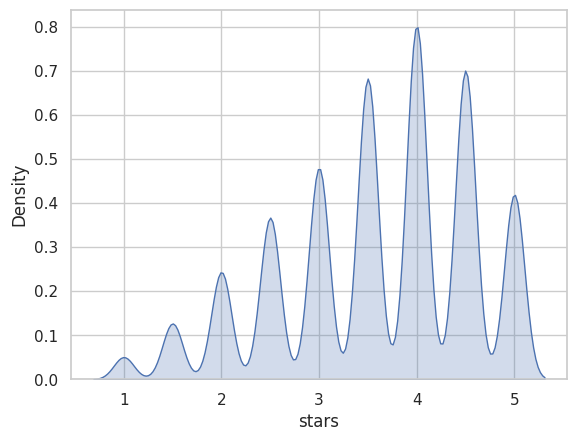

In [13]:
sns.kdeplot(data=df_business,x='stars',fill=True); plt.show()

## Scenario 9

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 59.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


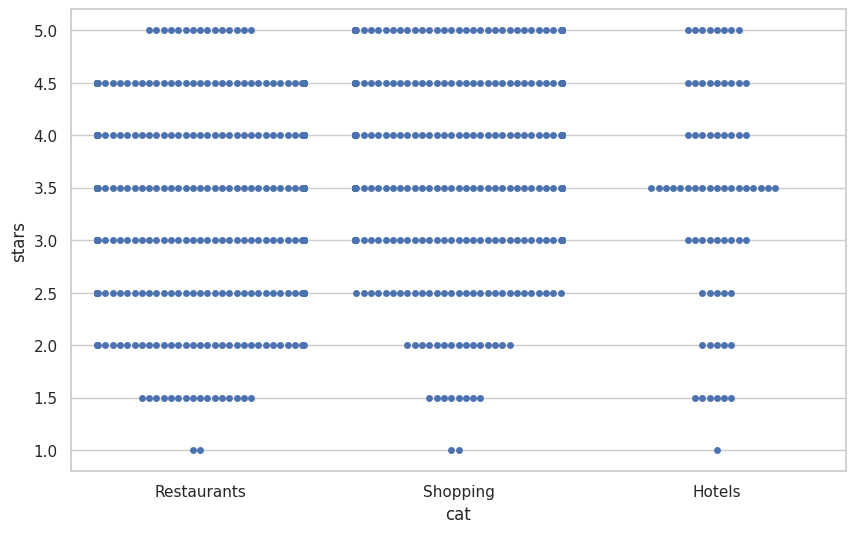

In [16]:
cats = ['Restaurants','Shopping','Hotels']

biz = df_business[df_business['categories'].astype(str).str.contains('|'.join(cats), na=False)].copy()

# محدود کردن داده به 1000 ردیف
biz = biz.sample(1000, random_state=42)

biz['cat'] = biz['categories'].str.extract(f"({'|'.join(cats)})")

plt.figure(figsize=(10,6))
sns.swarmplot(data=biz, x='cat', y='stars')
plt.show()


## Scenario 10

/usr/local/lib/python3.12/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname X identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/local/lib/python3.12/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname C identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/local/lib/python3.12/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname X identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not unde

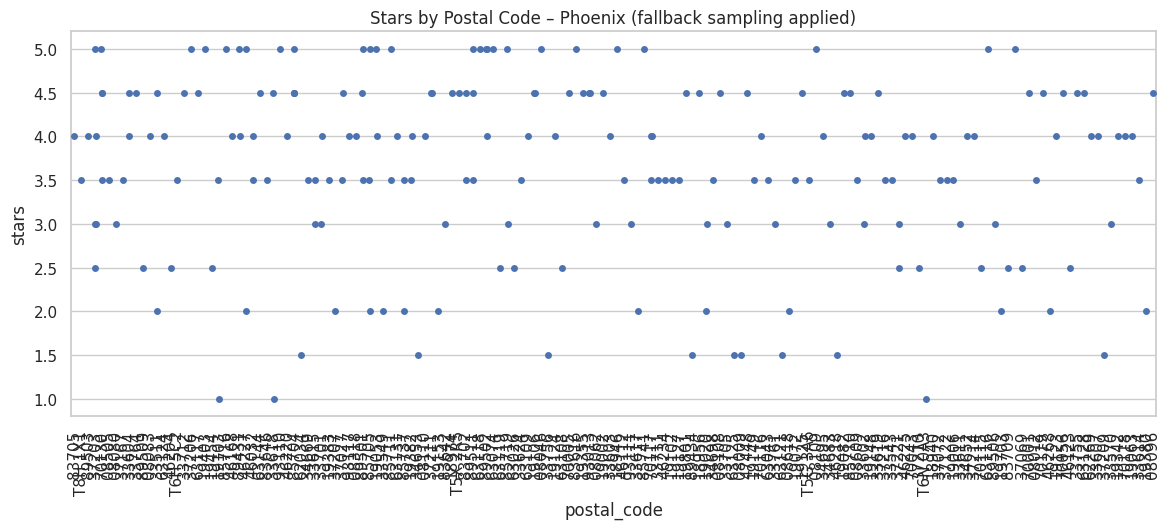

In [19]:
city = 'Phoenix'

biz = df_business[df_business['city'] == city].dropna(subset=['postal_code'])

# اگر دیتای Phoenix خیلی کم باشد، از همه‌ی دیتاست چندتایی می‌گیریم
if len(biz) < 50:
    biz = df_business.dropna(subset=['postal_code']).sample(200, random_state=42)

plt.figure(figsize=(14,5))
sns.stripplot(data=biz, x='postal_code', y='stars', jitter=True)
plt.xticks(rotation=90)
plt.title(f"Stars by Postal Code – {city} (fallback sampling applied)")
plt.show()


## Scenario 11

/tmp/ipython-input-1079580626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cats=['Restaurants','Shopping','Hotels','Beauty & Spas']; biz=df_business[df_business['categories'].astype(str).str.contains('|'.join(cats))]; biz['cat']=biz['categories'].str.extract(f"({'|'.join(cats)})"); sns.boxplot(data=biz,x='cat',y='review_count'); plt.yscale('log'); plt.show()


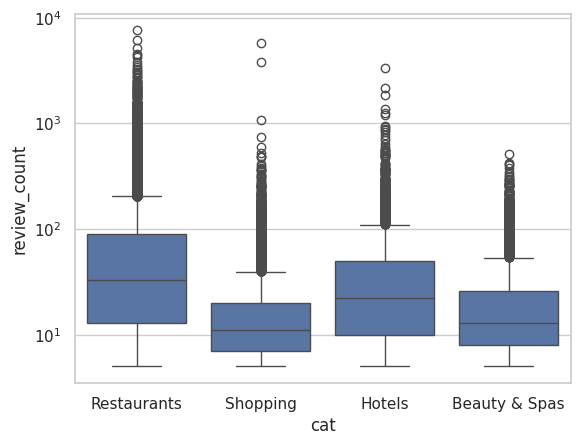

In [20]:
cats=['Restaurants','Shopping','Hotels','Beauty & Spas']; biz=df_business[df_business['categories'].astype(str).str.contains('|'.join(cats))]; biz['cat']=biz['categories'].str.extract(f"({'|'.join(cats)})"); sns.boxplot(data=biz,x='cat',y='review_count'); plt.yscale('log'); plt.show()

## Scenario 12

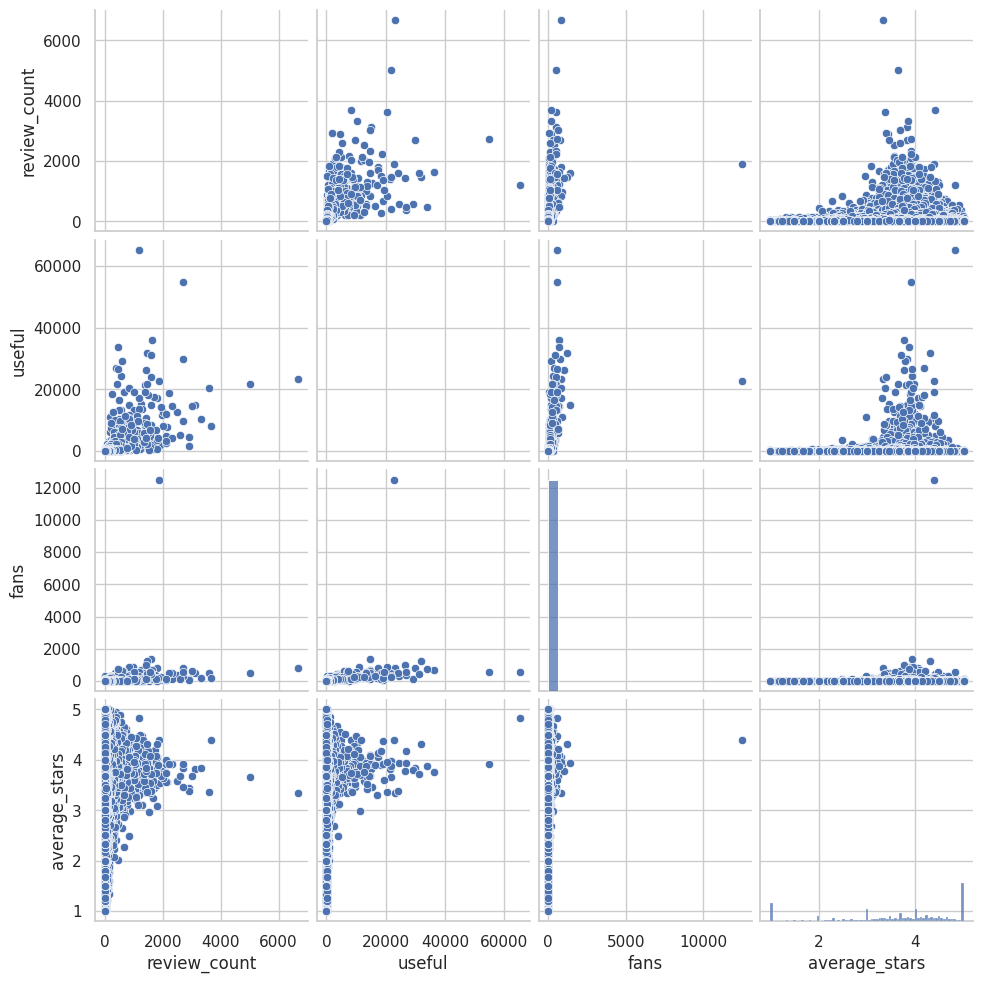

In [21]:
df=df_user[['review_count','useful','fans','average_stars']].dropna(); sns.pairplot(df); plt.show()

## Scenario 13

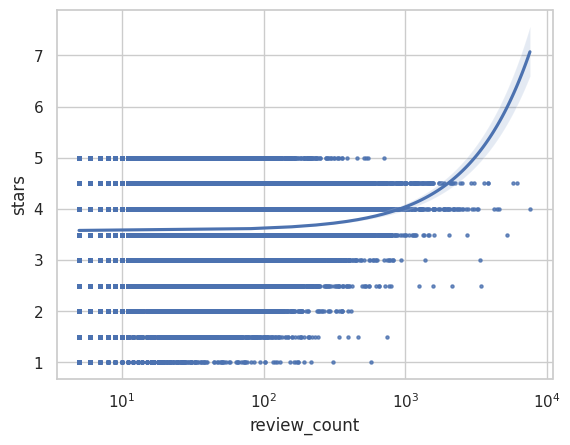

In [22]:
df=df_business[['review_count','stars']].dropna(); sns.regplot(data=df,x='review_count',y='stars',scatter_kws={'s':5}); plt.xscale('log'); plt.show()

## Scenario 14

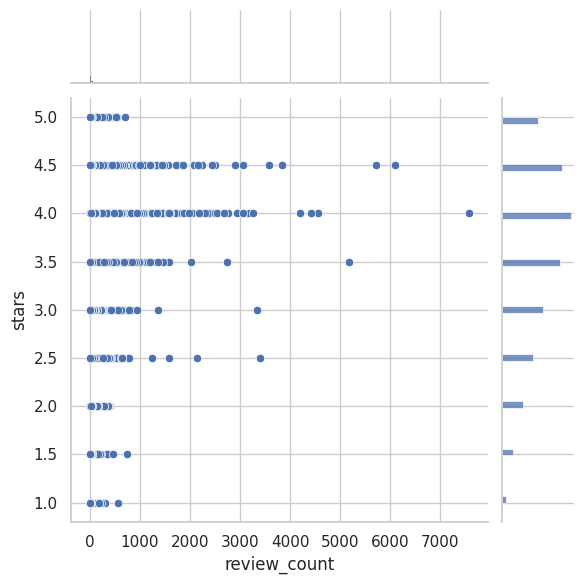

In [23]:
df=df_business[['review_count','stars']]; sns.jointplot(data=df,x='review_count',y='stars',kind='scatter'); plt.show()

## Scenario 15

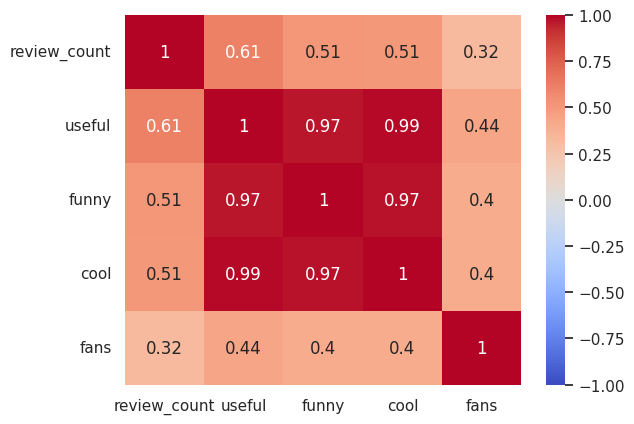

In [24]:
df=df_user[['review_count','useful','funny','cool','fans']].dropna(); corr=df.corr(); sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1); plt.show()